## 1. Random numbers with non uniform distributions: Inverse Transformation Method

(a) With the Inverse Transformation Method we can generate random
numbers according to the exponential distribution f(z;l) = l exp(-lz) starting from random numbers with uniform distribution:  if x is the random variable with uniform distribution in [0,1], then z = ln x  is distributed according to exp(-x). Write a code implementing
the algorithm.

In [17]:
import numpy as np
def invt(x,l):
    return -np.log(x)/l

In [26]:
from random import uniform
NMAX=10000
L=3
lst=[]
for i in range(NMAX):
    x=invt(uniform(0,1),L)
    lst.append(x)

(b) Check—doing a histogram—that the random variate z generated with
that algorithm is actually exponentially distributed.

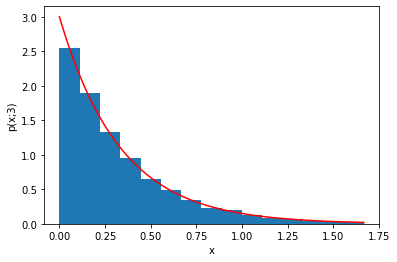

In [23]:
import matplotlib.pyplot as plt

#histogram
plt.hist(lst, bins=15, range=(0,5/L), density=True)
#function
x = np.linspace(0,5/L,100)
y = L*np.exp(-L*x)
plt.plot(x,y, 'r')
#labels
plt.xlabel('x')
plt.ylabel('p(x;3)')

plt.show()


(c) you can also do the fit of the histogram with an exponential
function using the least-square method, with ! as fitting
parameter. Check whether you get the expected value of !. (It is
convenient to make a semilog plot as suggested above and then make
a least-square linear fit; expected values are m=-l, q=ln(l))

In [7]:
#least squares fit
import numpy as np

def lsfit(x,y):
    if len(x)== len(y):
        n=len(x)
    else:
        print('error: array lenghts do not match')
        
    x=np.array(x)
    y=np.array(y)
    
    xm=sum(x)/n
    ym=sum(y)/n
    
    ssxx=sum(x**2)-n*xm**2
    #ssyy=sum(y**2)-n*ym**2
    ssxy=sum(x*y)-n*xm*ym

    m=ssxy/ssxx
    q=ym-m*xm
    
    return(m,q)

In [27]:
hist, bin_edges = np.histogram(lst, bins=10, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

#least squares fit
m,q=lsfit(bin_centers,np.log(hist))

print("l=", L, "\t -m=",-m, "\t exp(q)=", np.exp(q))

l= 3 	 -m= 2.8356878488837065 	 exp(q)= 2.6654224299746345


# 2. Random numbers with non uniform distributions: comparison between different algorithms
Suppose you want to generate a random variate x in (-1,1) with distribution
p(x) = 1/pi*sqrt(1-x^2).
Consider both methods suggested below, do the histograms and check that
both methods give correct results.

(a) From the Inverse Transformation Method:
generate a random number U with uniform distribution in [0,1] and
consider x = sin pi*(2U-1) !!! Isnt it sin pi*(U-1/2)?

In [6]:
import numpy as np
def invt(x):
    y=np.sin((2*x-1)*np.pi)
    return y

In [7]:
from random import uniform
NMAX=10000
lst=[]
for i in range(NMAX):
    x=invt(uniform(0,1))
    lst.append(x)

<ipython-input-8-de46edf63970>:7: RuntimeWarning: divide by zero encountered in true_divide
  y = 1/(np.pi*np.sqrt(1-x**2))


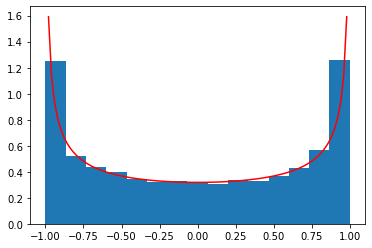

In [8]:
import matplotlib.pyplot as plt

#histogram
plt.hist(lst, bins=15, range=(-1,1), density=True)
#function
x = np.linspace(-1,1,100)
y = 1/(np.pi*np.sqrt(1-x**2))
plt.plot(x,y, 'r')


plt.show()

# 3. Random numbers with gaussian distribution: Box-Muller algorithm
Consider the Box-Muller algorithm to generate a random number gaussian
distribution (see for instance boxmuller.f90; the gasdev subroutine used
inside is similar to what you can find in “Numerical Recipes”: it gives a
gaussian distribution with # = 1 and average μ = 0). Do a histogram of
the data generated, calculate numerically from the sequence the average
value and the variance, check with the expected results.

In [9]:
import numpy as np
def boxmuller(v1,v2):
    r=np.sqrt(-2*np.log(v1))
    x=r*np.cos(2*np.pi*v2)
    y=r*np.sin(2*np.pi*v2)
    return x,y

In [10]:
from random import uniform
NMAX=10000
M=5
S=2

lst=[]
for i in range(NMAX):
    x = S * boxmuller(uniform(0,1),uniform(0,1))[0] + M
    y = S * boxmuller(uniform(0,1),uniform(0,1))[1] + M
    lst.append(x)
    lst.append(y)

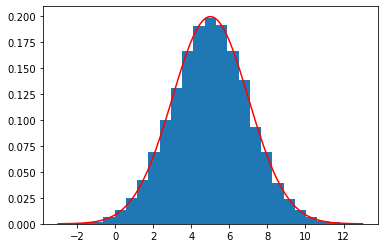

In [11]:
import matplotlib.pyplot as plt

#histogram
plt.hist(lst, bins=27, range=(M-4*S,M+4*S), density=True)
#function
x = np.linspace(M-4*S,M+4*S,100)
y = 1/(S*np.sqrt(2*np.pi))*np.exp(-(x-M)**2/(2*S**2))
plt.plot(x,y, 'r')


plt.show()

In [12]:
sm=0
sd=0
for x in lst:
    sm=sm + x
    sd=sd + x**2

XM = sm/(2*NMAX)
XS = np.sqrt((sd - XM**2*2*NMAX)/(2*NMAX-1))

print("EXPECTED AVG", M, "\t CALCULATED AVG", XM)
print("EXPECTED DEV", S, "\t CALCULATED DEV", XS)

EXPECTED AVG 5 	 CALCULATED AVG 4.995743311287511
EXPECTED DEV 2 	 CALCULATED DEV 2.007918657620381


## 4. Simulation of radioactive decay

(a) Write a program for a numerical simulation of the radioactive decay,
with a decay parameter L in input.

In [13]:
from random import uniform

N0=100   #Starting population
L=0.35     #L<1, probability for each nucleus to decay in a given dt

lst=[]
N=N0

while N !=0:
    lst.append(N)
    for i in range(N):
        x=uniform(0,1)
        if x <= L:
            N=N-1
    

(b) Use the code with “reasonable” values of the parameters (e.g., N(0)
about 1000) and save N(t) in a data file. Check whether N(t) =
N(0)exp(-Lt). You could make use of a least-square fit

<function matplotlib.pyplot.show(close=None, block=None)>

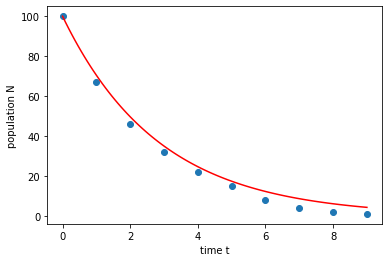

In [14]:
import matplotlib.pyplot as plt
import numpy as np
#simulation
plt.plot(range(len(lst)),lst, 'o')
plt.xlabel('time t')
plt.ylabel('population N')
#function
x = np.linspace(0,len(lst)-1,100)
y = N0 * np.exp(-L*x)
plt.plot(x,y, 'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

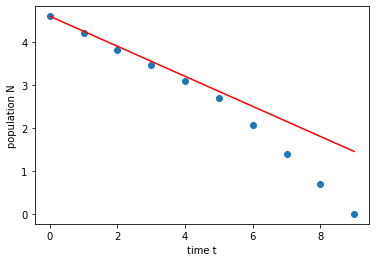

In [15]:
import matplotlib.pyplot as plt
#simulation
plt.plot(range(len(lst)),np.log(lst), 'o')
plt.xlabel('time t')
plt.ylabel('population N')
#function
x = np.linspace(0,len(lst)-1,100)
y = np.log(N0)-L*x
plt.plot(x,y, 'r')
plt.show

In [16]:
#least squares fit
m,q=lsfit(range(len(lst)),np.log(lst))

print("l=", L, "\t -m=",-m)
print("N0=", N0, "\t exp(q)=", np.exp(q))

l= 0.35 	 -m= 0.5017027894434652
N0= 100 	 exp(q)= 129.52632427601043


I consistently find an higher value for l than expected

In [28]:
from random import uniform

N0MAX=20000   #Starting population
L=0.35     #L<1, probability for each nucleus to decay in a given dt
lstm=[]
for N in range(100,N0MAX,100):
    lst=[]
    N=N0

    while N !=0:
        lst.append(N)
        for i in range(N):
            x=uniform(0,1)
            if x <= L:
                N=N-1
    m,q=lsfit(range(len(lst)),np.log(lst))
    lstm.append(abs(L+m)/L)

Text(0, 0.5, 'abs(m+L)/L')

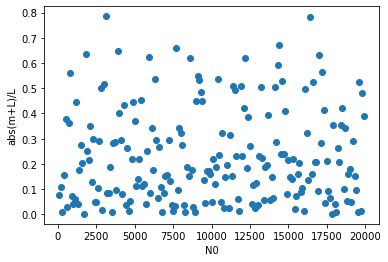

In [29]:
import matplotlib.pyplot as plt
import numpy as np
#error
plt.plot(range(100,N0MAX,100),lstm, 'o')
plt.xlabel('N0')
plt.ylabel('abs(m+L)/L')